## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [0]:
import keras

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
x_train[0].shape

(28, 28)

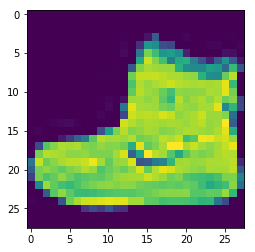

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
image = x_train[0]
plt.figure(0)
plt.imshow(image)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)

In [0]:
y_test = keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [0]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# early stopping patience=5 -- if accuracy is not improving after 5 epochs then do not proceed further
es = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=32, callbacks=[es])

W0818 11:40:46.151682 139862415411072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 11:40:46.167415 139862415411072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 11:40:46.183250 139862415411072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 11:40:46.185250 139862415411072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 11:40:46.242265 139862415411072 deprecation_wrappe

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 223us/step - loss: 0.3742 - acc: 0.8651 - val_loss: 0.3011 - val_acc: 0.8876
Epoch 2/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.2353 - acc: 0.9132 - val_loss: 0.2529 - val_acc: 0.9055
Epoch 3/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.1711 - acc: 0.9365 - val_loss: 0.2618 - val_acc: 0.9097
Epoch 4/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.1198 - acc: 0.9555 - val_loss: 0.2585 - val_acc: 0.9143
Epoch 5/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.0807 - acc: 0.9706 - val_loss: 0.3064 - val_acc: 0.9111
Epoch 6/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.0539 - acc: 0.9810 - val_loss: 0.3613 - val_acc: 0.9099
Epoch 7/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.0396 - acc: 0.9861 - val_l

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=32, callbacks=[es])

W0818 11:42:24.180019 139862415411072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0818 11:42:24.195096 139862415411072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.3865 - acc: 0.8616 - val_loss: 0.3089 - val_acc: 0.8869
Epoch 2/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.2484 - acc: 0.9098 - val_loss: 0.2469 - val_acc: 0.9121
Epoch 3/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.2014 - acc: 0.9257 - val_loss: 0.2286 - val_acc: 0.9184
Epoch 4/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.1655 - acc: 0.9382 - val_loss: 0.2208 - val_acc: 0.9218
Epoch 5/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.1362 - acc: 0.9485 - val_loss: 0.2407 - val_acc: 0.9138
Epoch 6/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.1140 - acc: 0.9568 - val_loss: 0.2350 - val_acc: 0.9216
Epoch 7/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.0951 - acc: 0.9643 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
img_generator = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
img_generator.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

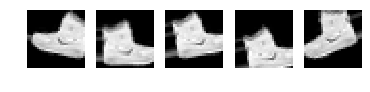

In [23]:
gen = img_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [24]:
batch_size=64
model.fit_generator(img_generator.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_test, y_test), steps_per_epoch=len(x_train)//batch_size, epochs=10, callbacks=[es])

Epoch 1/10
937/937 [==============================] - 15s 16ms/step - loss: 0.6691 - acc: 0.7584 - val_loss: 0.4341 - val_acc: 0.8453
Epoch 2/10
937/937 [==============================] - 15s 16ms/step - loss: 0.5097 - acc: 0.8108 - val_loss: 0.3983 - val_acc: 0.8537
Epoch 3/10
937/937 [==============================] - 15s 16ms/step - loss: 0.4747 - acc: 0.8240 - val_loss: 0.3707 - val_acc: 0.8648
Epoch 4/10
937/937 [==============================] - 15s 16ms/step - loss: 0.4537 - acc: 0.8328 - val_loss: 0.3456 - val_acc: 0.8718
Epoch 5/10
937/937 [==============================] - 15s 16ms/step - loss: 0.4391 - acc: 0.8392 - val_loss: 0.3525 - val_acc: 0.8713
Epoch 6/10
937/937 [==============================] - 15s 16ms/step - loss: 0.4278 - acc: 0.8406 - val_loss: 0.3558 - val_acc: 0.8662
Epoch 7/10
937/937 [==============================] - 15s 16ms/step - loss: 0.4184 - acc: 0.8457 - val_loss: 0.3297 - val_acc: 0.8769
Epoch 8/10
937/937 [==============================] - 15s 16ms

###  Report the final train and validation accuracy

In [25]:
model.evaluate(x_train, y_train)

60000/60000 [==============================] - 3s 56us/step


[0.3042815688967705, 0.8853333333333333]

In [26]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.3371911446809769, 0.8755]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [27]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [39]:
x_train.shape

(50000, 32, 32, 3)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
x_train = x_train/255
x_test = x_test/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

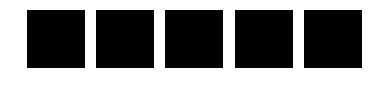

In [48]:
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()